# Experimento 4: _grid search_ em SVM

Para aprimoraro ddesempenho de classificação no `one VS all`.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from seaborn import scatterplot
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, GroupKFold

# Carregando intervalo de chb
file_range = [
    '01', '02', '03', '04', '05', '07', '08',
    '10', '11', '12', '13', '14', '15', '16',
    '17', '18', '19', '21', '22', '23', '24'
]

def dataframe_from_chb(chb_number:str) -> pd.DataFrame:
    df = pd.read_csv(f'./chb{chb_number}/chb{chb_number}_com_dwt.csv')
    df['chb'] = chb_number
    return df

chb_df = pd.concat([dataframe_from_chb(file) for file in file_range], ignore_index=True)

chb_groups = chb_df.pop('chb').values
chb_y = chb_df.pop('target').values
chb_X = StandardScaler().fit_transform(chb_df.values)

C_grid = {'C':np.linspace(1, 99), 'cache_size':[1000]}

In [2]:
folds = GroupKFold(n_splits=len(np.unique(chb_groups))).split(chb_X, chb_y, chb_groups)

gs = GridSearchCV(
    estimator=SVC(),
    param_grid=C_grid,
    cv=folds
).fit(
    X=chb_X,
    y=chb_y,
    groups=chb_groups
)

pd.DataFrame(gs.cv_results_).to_csv('./06-gs-svc-param_C.csv', index=False)

In [3]:
columns = ['rank_test_score', 'param_C', 'mean_test_score', 'std_test_score']

cv_results_df = pd.read_csv('./06-gs-svc-param_C.csv')[columns]

cv_results_df.style.background_gradient(cmap='Blues', subset=['mean_test_score']).hide_index()

rank_test_score,param_C,mean_test_score,std_test_score
1,1.000000,0.812069,0.170564
2,3.000000,0.802699,0.172211
3,5.000000,0.794360,0.178231
4,7.000000,0.791417,0.178229
5,9.000000,0.789545,0.177078
6,11.000000,0.787785,0.177732
7,13.000000,0.787164,0.178027
8,15.000000,0.785521,0.179230
9,17.000000,0.784179,0.180364
12,19.000000,0.782299,0.180639


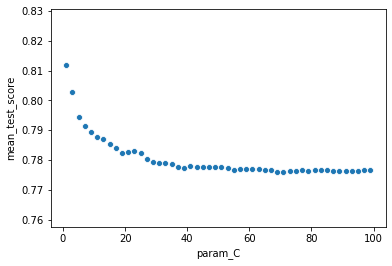

In [4]:
scatterplot(
    data=cv_results_df,
    x='param_C',
    y='mean_test_score'
)